In [90]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [91]:
final_data = pd.read_csv('Dataset-1a_new.csv')    #reading the csv file of 2000-2003 SEER database
print('Dataset :',final_data.shape)               #printing the dataset 
final_data.info()
final_data


Dataset : (10999, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TUMOR SIZE            10999 non-null  float64
 1   Stage Classification  10999 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 171.9 KB


,TUMOR SIZE,Stage Classification
0,0.25,4
1,0.89,2
2,0.95,1
3,0.35,2
4,0.52,4
...,...,...
10994,20.80,4
10995,20.79,4
10996,20.20,4
10997,20.28,4


In [92]:
final_data2 = pd.read_csv('Dataset-1b_new.csv')       #reading the csv file of 1988-99 SEER database
print('Dataset :',final_data2.shape)                  #printing the dataset
final_data2.info()
final_data2


Dataset : (10988, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10988 entries, 0 to 10987
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tumor size            10988 non-null  float64
 1   Stage Classification  10988 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 171.8 KB


,tumor size,Stage Classification
0,0.50,1
1,0.91,4
2,0.40,2
3,0.87,1
4,0.25,3
...,...,...
10983,20.07,3
10984,20.20,3
10985,20.85,3
10986,20.66,3


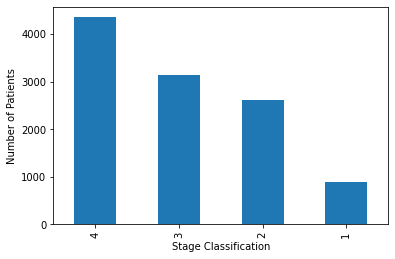

In [93]:
final_data['Stage Classification'].value_counts().plot(kind='bar') #plotting the bar graph of 2000-2003 SEER dataset on the basis of Stage Classification and Number of Patients
plt.xlabel('Stage Classification') # Plotting coloumn "Stage Classification" on X-axis
plt.ylabel('Number of Patients')   # Plotting coloumn "Number of Patients" on Y-axis
plt.show()

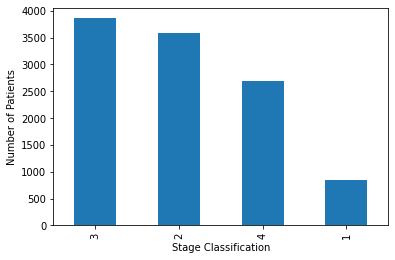

In [94]:
final_data2['Stage Classification'].value_counts().plot(kind='bar') #plotting the bar graph of 1988-1999 SEER dataset on the basis of Stage Classification and Number of Patients
plt.xlabel('Stage Classification') # Plotting coloumn "Stage Classification" on X-axis
plt.ylabel('Number of Patients')  # Plotting coloumn "Number of Patients" on Y-axis
plt.show()

# Data For Training And Testing

In [95]:
from sklearn.model_selection import train_test_split
Y_train = final_data['Stage Classification']
X_train = final_data.drop(columns=['Stage Classification'])

#Y_test = final_data2['Stage Classification']
#X_test = final_data2.drop(columns=['Stage Classification'])

X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=10)
########################3

print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (9899, 1)
Y train shape:  (9899,)
X test shape:  (1100, 1)
Y test shape:  (1100,)


# Modelling with Logisitic Regression

In [96]:
from sklearn.linear_model import LogisticRegression

# We defining the model
model = LogisticRegression(C=10)

# We train the model
model.fit(X_train, Y_train)

# We predict target values
Y_predict1 = model.predict(X_test)

In [97]:
# Test score
score_model1 = model.score(X_test, Y_test) # Calculating the Accuracy of Logisitic Regression Modelling
print(score_model1) # Printing the Accuracy of Logisitic Regression Modelling

0.42818181818181816


# Modelling with State Vector Machine (SVM)

In [98]:
from sklearn.ensemble import BaggingClassifier as BagClassifier
from sklearn.multiclass import OneVsRestClassifier as OVRClassifier
from sklearn.svm import *

# We define the SVM model
model = OVRClassifier(BagClassifier(SVC(C=10,kernel='rbf',random_state=10, probability=True), 
                                               n_jobs=-1))

# We train model
model.fit(X_train, Y_train)

# We predict target values
Y_predict2 = model.predict(X_test)

In [99]:
score_model2 = model.score(X_test, Y_test) # Calculating the Accuracy of State Vector Machine(SVM) Modelling
print(score_model2) # Printing the Accuracy of State Vector Machine(SVM) Modelling

0.5290909090909091


# Decision Tree

In [100]:
from sklearn.tree import DecisionTreeClassifier

# We define the model
model = DecisionTreeClassifier(random_state=9)

# We train model
model.fit(X_train, Y_train)

# We predict target values
Y_predict4 = model.predict(X_test)

In [101]:
score_model3 = model.score(X_test, Y_test) # Calculating the Accuracy of Decision Tree Modelling
print(score_model3) # Printing the Accuracy of Decision Tree Modelling

0.5590909090909091


# Naive Bayes

In [102]:
from sklearn.naive_bayes import GaussianNB

# We define the model
model = GaussianNB()

# We train model
model.fit(X_train, Y_train)

# We predict target values
Y_predict3 = model.predict(X_test)

In [103]:
score_model4 = model.score(X_test, Y_test)   # Calculating the Accuracy of Naive Bayes Modelling
print(score_model4) # Printing the Accuracy of Naive Bayes Modelling

0.5


# Random Forest


In [104]:
from sklearn.ensemble import RandomForestClassifier

# We define the model
model = RandomForestClassifier(n_estimators=100,random_state=9,n_jobs=-1)

# We train model
model.fit(X_train, Y_train)

# We predict target values
Y_predict5 = model.predict(X_test)

In [105]:
score_model5 = model.score(X_test, Y_test) # Calculating the Accuracy of Random Forest Modelling
print(score_model5)   # Printing the Accuracy of Random Forest Modelling

0.5481818181818182


<BarContainer object of 5 artists>

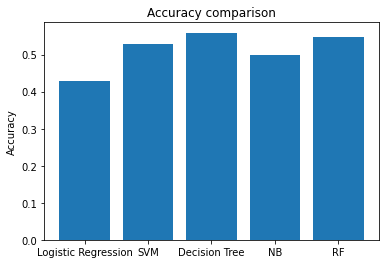

In [106]:
dict = {}
dict['Logistic Regression'] = score_model1
dict['SVM'] = score_model2
dict['Decision_Tree'] = score_model3
dict['NB'] = score_model4
dict['RF'] = score_model5

y = [dict['Logistic Regression'], dict['SVM'], dict['Decision_Tree'], dict['NB'], dict['RF']] #Taking Accuracy of each model on the Y-axis
x = ['Logistic Regression', 'SVM', 'Decision Tree', 'NB','RF'] #Taking name of each model on the X-axis

plt.title("Accuracy comparison") 
plt.ylabel("Accuracy")  # Plotting the accuracy score of each model on Y-axis
plt.bar(x,y)            # Plotting the bar graph for accuracy comparison of each model
#plt.title("Accuracy comparison")
#plt.ylabel("Accuracy")
#plt.bar(x,accuracy)